Aggressive Samples: 34613, Non-Aggressive Samples: 93825
Total Samples: 128438
Aggressive Percentage: 26.949189492206354
Non-Aggressive Percentage: 73.05081050779364
Aggressive Message Samples
	In  years Islam has never produced anything other than tyrants and the world is obligated to deal with them
	RT kennedyjordan How can feminists say they want equality when they see men as lesser beings LateNightThoughts notsexist
	You are a cunting cunt
	YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YOU SUCK YO

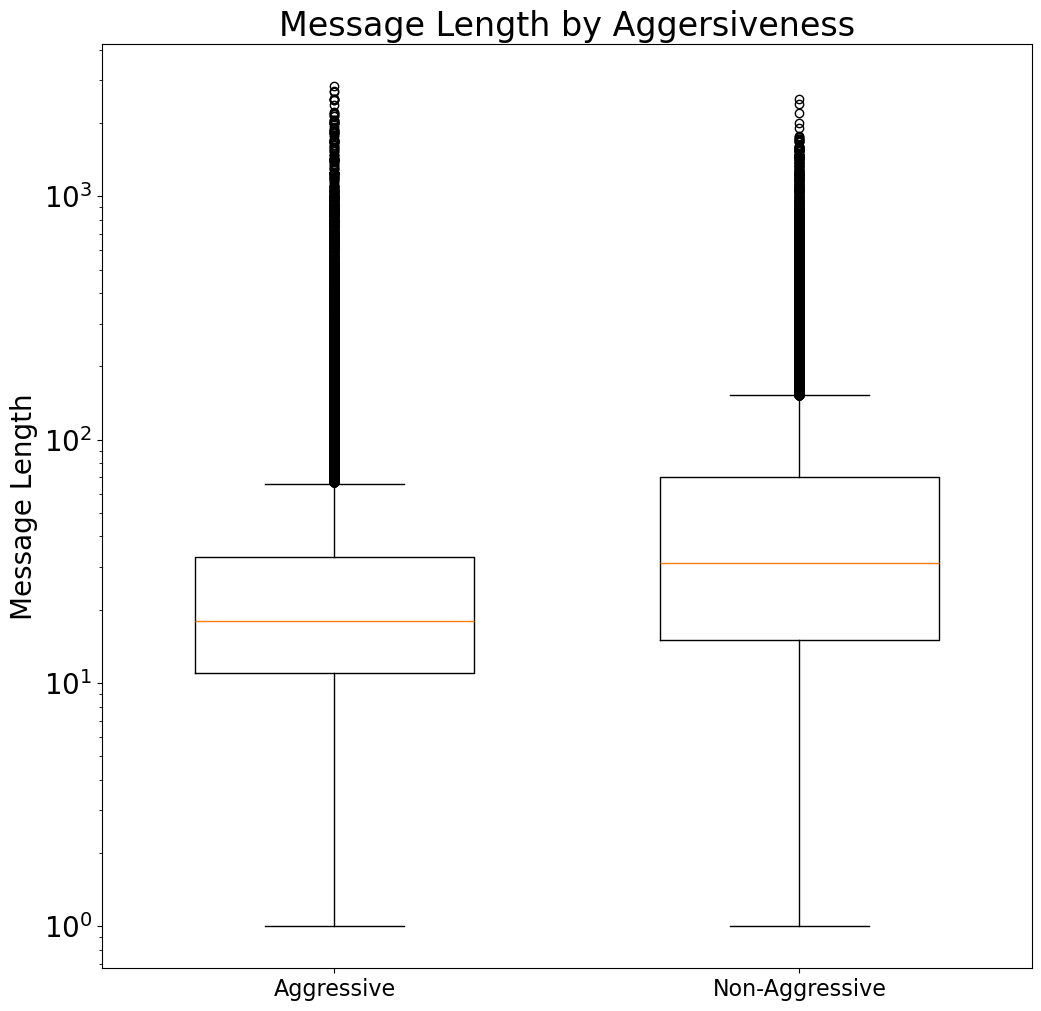

Top 30 Aggressive Words
	you: 36866
	the: 34952
	a: 34013
	I: 29615
	to: 28894
	and: 25666
	is: 23613
	of: 20876
	YOU: 17514
	your: 13188
	that: 13142
	in: 12846
	are: 12359
	it: 10721
	You: 9693
	not: 9341
	fuck: 9190
	for: 9184
	on: 8416
	have: 7710
	this: 7460
	me: 6952
	be: 6874
	with: 6503
	like: 6489
	my: 6475
	i: 6301
	FUCK: 6189
	SUCK: 5794
	as: 5050


In [57]:
import os
import pandas as pd
from matplotlib import pyplot as plt

data_dir = "data"
if not os.path.exists(data_dir):
  os.makedirs(data_dir)

plot_dir = "plots"
if not os.path.exists(plot_dir):
  os.makedirs(plot_dir)

speech_df = pd.read_csv(os.path.join(data_dir, "messages.csv"))

aggressive = speech_df[speech_df["Aggressive"] == 1]
non_aggressive = speech_df[speech_df["Aggressive"] == 0]

print(f'Aggressive Samples: {len(aggressive)}, Non-Aggressive Samples: {len(non_aggressive)}')
print(f'Total Samples: {len(speech_df)}')

print(f'Aggressive Percentage: {len(aggressive) / len(speech_df) * 100}')
print(f'Non-Aggressive Percentage: {len(non_aggressive) / len(speech_df) * 100}')

aggressive_sample = list(aggressive.sample(5)["Message"])
non_aggressive_sample = list(non_aggressive.sample(5)["Message"])

print(f'Aggressive Message Samples')
for message in aggressive_sample:
  print(f'\t{message}')

print(f'Non-Aggressive Message Samples')
for message in non_aggressive_sample:
  print(f'\t{message}')

average_length = speech_df["Message"].str.len().mean()
print(f'Average Message Length: {average_length}')

average_length_aggressive = aggressive["Message"].str.len().mean()
average_length_non_aggressive = non_aggressive["Message"].str.len().mean()
print(f'Average Aggressive Message Length: {average_length_aggressive}')
print(f'Average Non-Aggressive Message Length: {average_length_non_aggressive}')

average_word_count = speech_df["Message"].str.split().str.len().mean()
print(f'Average Word Count: {average_word_count}')

average_word_count_aggressive = aggressive["Message"].str.split().str.len().mean()
average_word_count_non_aggressive = non_aggressive["Message"].str.split().str.len().mean()
print(f'Average Aggressive Word Count: {average_word_count_aggressive}')
print(f'Average Non-Aggressive Word Count: {average_word_count_non_aggressive}')

plt.figure(figsize=(12, 12))
plt.boxplot([aggressive["Message"].str.split().str.len(), non_aggressive["Message"].str.split().str.len()], tick_labels=["Aggressive", "Non-Aggressive"], widths=0.6)
plt.yscale("log")
plt.title("Message Length by Aggersiveness", fontsize=24)
plt.ylabel("Message Length", fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=20)
plt.savefig(os.path.join(plot_dir, "message_length_boxplot.png"))
plt.show()

aggressive_word_counts = speech_df[speech_df["Aggressive"] == 1]["Message"].str.split().explode().value_counts()
print(f'Top 30 Aggressive Words')
for word, count in aggressive_word_counts.head(30).items():
  print(f'\t{word}: {count}')